# **Contents:**

Finding Image Details

Splitting an Image into Individual Channels

Digital Negative

Image Thresholding

Adaptive Thresholding

In [ ]:
import cv2
from google.colab import files
uploaded=files.upload()

Saving flower2.jpg to flower2.jpg


# ***Finding Image Details***

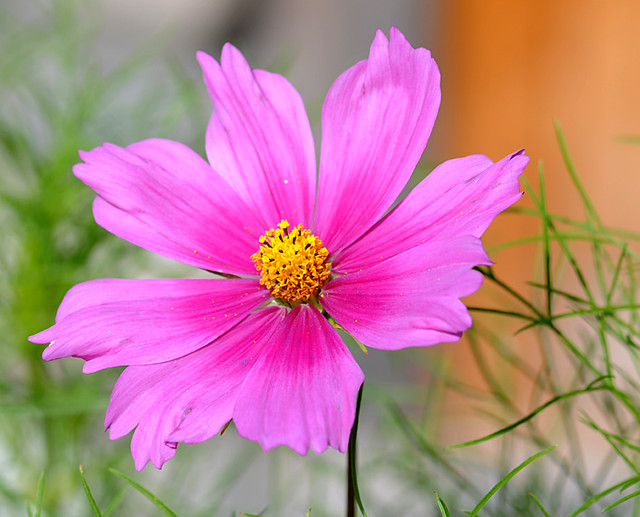

In [ ]:
img = cv2.imread('flower2.jpg')
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# ***Splitting an Image into Individual Channels***

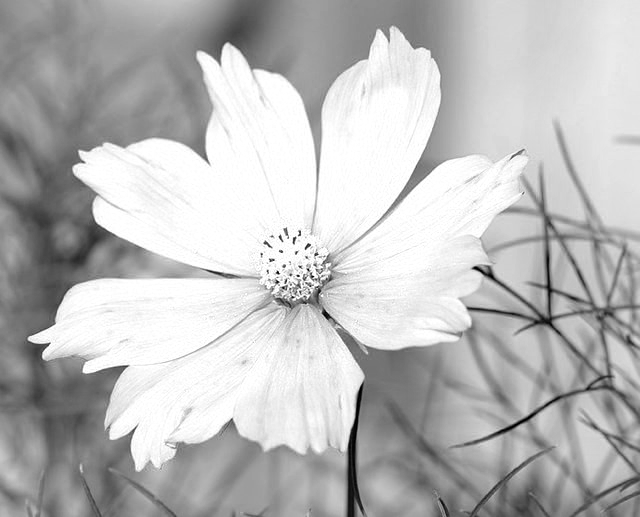

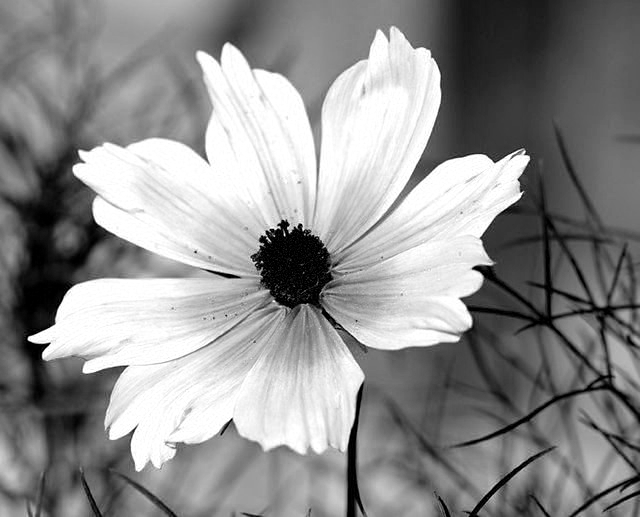

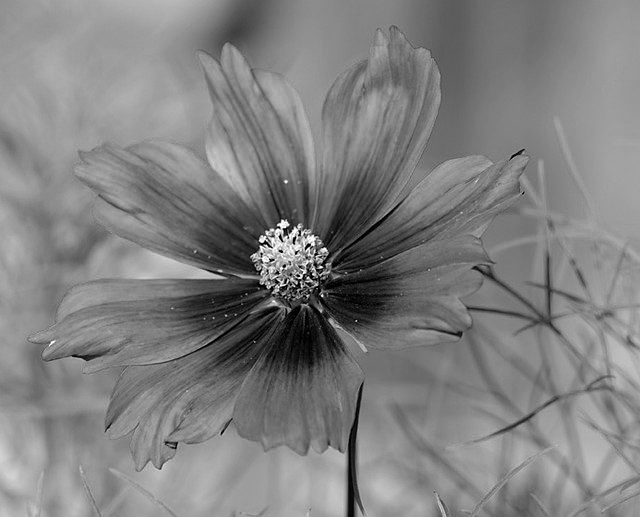

In [ ]:
blue, green, red = cv2.split(img) # Split the image into its channels
cv2_imshow(red) # Display the red channel in the image
cv2_imshow(blue) # Display the red channel in the image
cv2_imshow(green) # Display the red channel in the image

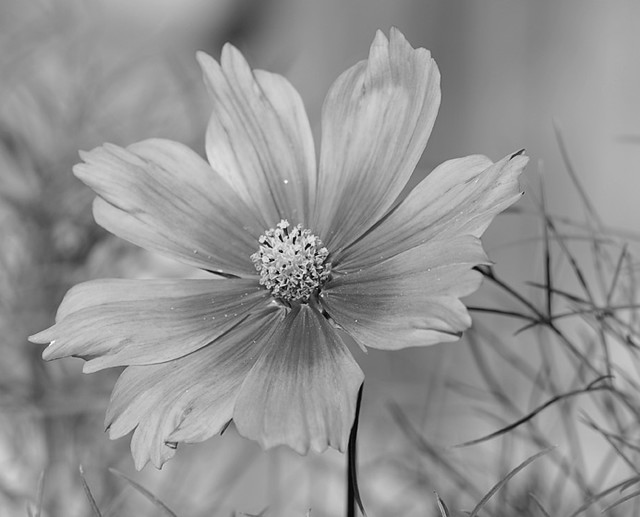

In [ ]:
#img_gs = cv2.imread('lotus.jpg', cv2.IMREAD_GRAYSCALE) # Convert image to grayscale
img_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY ) #Convert image to grayscale
cv2_imshow(img_gs) # Display the grayscale version of image

# ***Digital Negative***

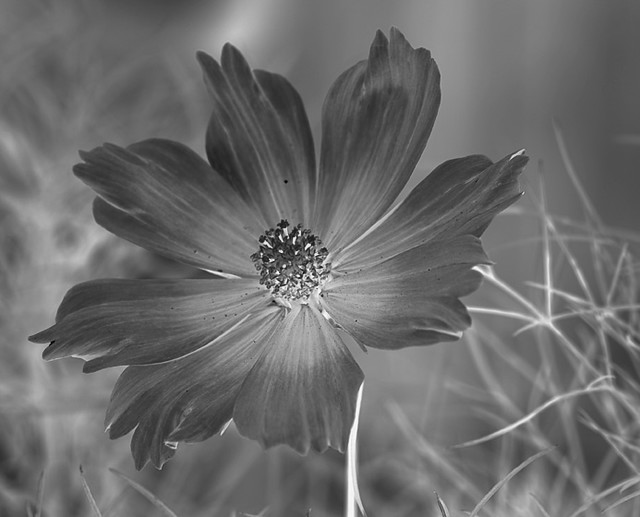

In [ ]:
import numpy as np
max_intensity = 255
(h, w) = img_gs.shape
output = img_gs.copy()
for i in np.arange(h):
  for j in np.arange(w):
    a = output.item(i,j)
    b = max_intensity - a
    output.itemset((i,j), b)
cv2.imwrite('images/brightness.jpg', output)
cv2_imshow(output)

# ***Image Thresholding***
If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). 

cv2.threshold: 
First argument - the source image, which should be a grayscale image. Second argument - the threshold value which is used to classify the pixel values. 
Third argument - the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

cv2.THRESH_BINARY
cv2.THRESH_BINARY_INV
cv2.THRESH_TRUNC


In [ ]:
# from google.colab import files
# uploaded=files.upload()

Saving lotus.jpg to lotus (2).jpg


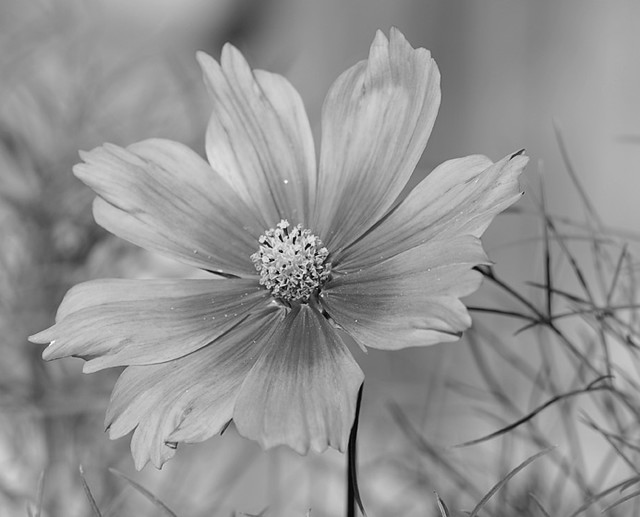

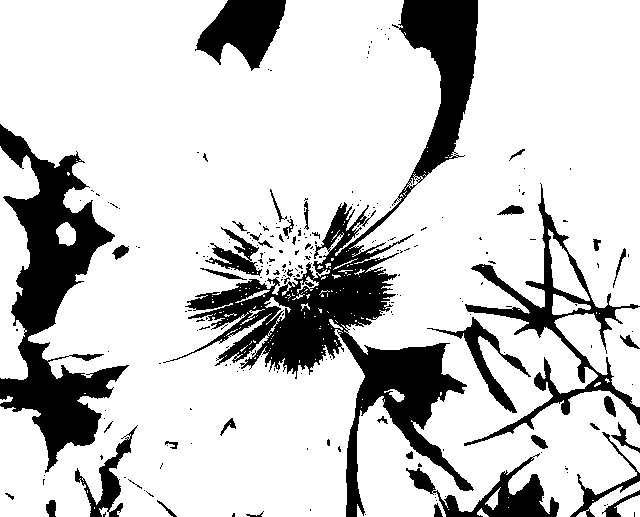

In [ ]:
#img1 = cv2.imread('lotus.jpg', 0)
cv2_imshow(img_gs)
# Perform binary thresholding on the image with T = 125
ret,thresh1 = cv2.threshold(img_gs, 125, 255, cv2.THRESH_BINARY)
#from google.colab.patches import cv2_imshow
cv2_imshow(thresh1)

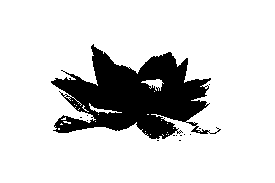

In [ ]:
ret,thresh2 = cv2.threshold(img1,125,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh2)

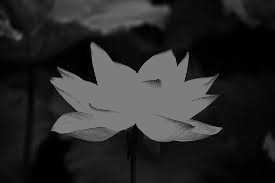

In [ ]:
ret,thresh3 = cv2.threshold(img1,125,255,cv2.THRESH_TRUNC)
cv2_imshow(thresh3)

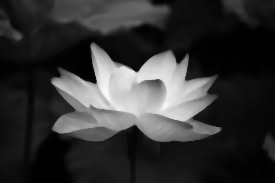

In [ ]:
img2 = cv2.medianBlur(img1,5)
cv2_imshow(img2)

# ***Adaptive Thresholding***
 It is used when image has different lighting conditions in different areas.
 The threshold for a small regions of the image. 
 So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

Syntax: cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)

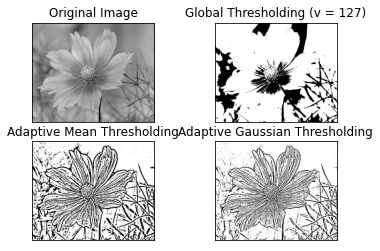

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ret,th1 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img2, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
uploaded=files.upload()

Saving sudoku-original.jpg to sudoku-original (1).jpg


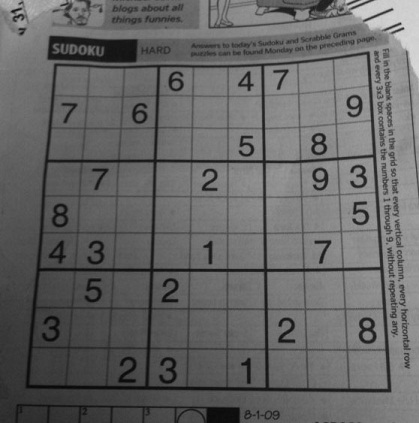

In [ ]:
img3=cv2.imread('sudoku-original.jpg',0)
cv2_imshow(img3)

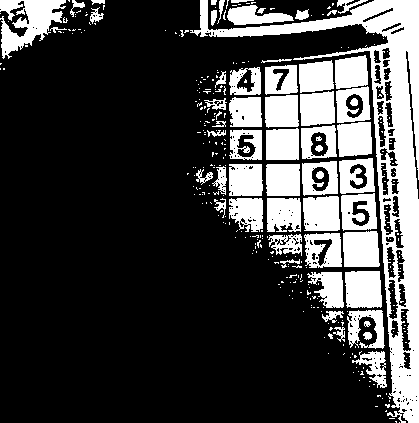

In [ ]:
ret,th1 = cv2.threshold(img3,127,255,cv2.THRESH_BINARY)
cv2_imshow(th1)

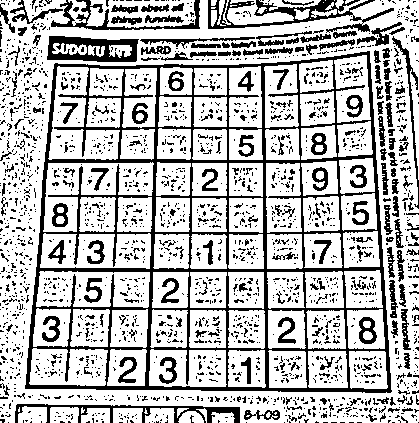

In [ ]:
th2 = cv2.adaptiveThreshold(img3,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
cv2_imshow(th2)

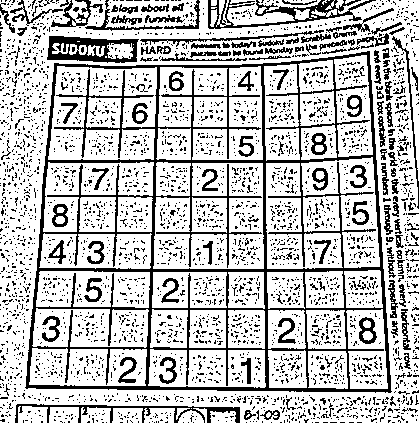

In [ ]:
th3 = cv2.adaptiveThreshold(img3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
cv2_imshow(th3)